In [2]:
pip install opencv-python


  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl (12.6 MB)

  Attempting uninstall: numpy

    Found existing installation: numpy 2.3.5

    Uninstalling numpy-2.3.5:

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
      Successfully uninstalled numpy-2.3.5
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---

In [12]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [13]:
DIRECTORY= r"E:\download\Rice"
CATAGORIES=['brown_spot','bacterial_leaf_blight','healthy','leaf_blast','leaf_scald','neck_blast','sheath blight','rice hispa','narrow_brown_spot','Tungro']


In [14]:
data=[]

for categories in CATAGORIES:
    folder=os.path.join(DIRECTORY,categories)
    label=CATAGORIES.index(categories)


        
    for img in os.listdir(folder):
        img=os.path.join(folder,img)
        img_arr=cv2.imread(img)
        img_arr=cv2.resize(img_arr,(224,224))
        
        data.append([img_arr,label])

In [8]:
data

[[array([[[105, 226, 158],
          [103, 224, 157],
          [106, 222, 155],
          ...,
          [ 88, 223, 157],
          [ 90, 226, 160],
          [ 95, 231, 165]],
  
         [[100, 220, 155],
          [101, 223, 156],
          [106, 225, 157],
          ...,
          [ 88, 222, 156],
          [ 93, 227, 161],
          [ 94, 228, 162]],
  
         [[ 99, 222, 156],
          [102, 223, 158],
          [102, 220, 155],
          ...,
          [ 90, 222, 155],
          [ 93, 225, 159],
          [ 88, 220, 154]],
  
         ...,
  
         [[105, 133, 105],
          [109, 137, 107],
          [108, 136, 106],
          ...,
          [ 32,  87,  54],
          [ 32, 118,  79],
          [ 41, 148,  99]],
  
         [[111, 139, 109],
          [111, 139, 108],
          [112, 140, 110],
          ...,
          [ 25,  93,  58],
          [ 30, 133,  86],
          [ 41, 162, 108]],
  
         [[108, 136, 106],
          [110, 138, 108],
          [108, 136, 106

In [15]:
random.shuffle(data)

In [16]:
x=[]
y=[]
for features,label in data:
    x.append(features)
    y.append(label)

In [17]:
X= np.array(x)
Y=np.array(y)

In [18]:
X = X.astype('float32') / 255.0

In [19]:
X.shape

(3422, 224, 224, 3)

In [21]:
pip install tensorflow

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached grpcio-1.76.0-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached ml_dtypes-0.5.4-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached optree-0.18.0-cp313-cp313-win_amd64.whl.metadata (35 kB)
Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl (332.0 MB)
Using cach

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation

C:\Users\User\anaconda31\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [23]:
model=Sequential()

model.add( Conv2D(64,(3,3),input_shape=X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(10,activation='softmax'))

C:\Users\User\anaconda31\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.fit(X,Y,epochs=5,validation_split=0.2)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 218ms/step - accuracy: 0.3701 - loss: 1.7520 - val_accuracy: 0.5255 - val_loss: 1.3586
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 210ms/step - accuracy: 0.6167 - loss: 1.1270 - val_accuracy: 0.5971 - val_loss: 1.1321
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 211ms/step - accuracy: 0.6883 - loss: 0.9212 - val_accuracy: 0.6774 - val_loss: 0.9459
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 210ms/step - accuracy: 0.7446 - loss: 0.7298 - val_accuracy: 0.6190 - val_loss: 1.0067
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 213ms/step - accuracy: 0.7764 - loss: 0.6386 - val_accuracy: 0.7372 - val_loss: 0.8147


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       216,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737,504 (2.81 MB)

 Trainable params: 245,834 (960.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 491,670 (1.88 MB)

In [39]:
from keras.preprocessing import image
import numpy as np
img_pred = image.load_img(r"E:\download\Rice\neck_Blast\IMG20201109210545_00.jpg",target_size=(224, 224))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)
img_pred = img_pred / 255.0

rslt = model.predict(img_pred)
class_labels = ["brown_spot","bacterial_leaf_blight","healthy","leaf_blast","leaf_scald","neck_blast","sheath_blight","rice_hispa","narrow_brown_spot","Tungro"]

predicted_class_index = np.argmax(rslt)
prediction = class_labels[predicted_class_index]
print("Predicted Disease:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Disease: neck_blast


In [40]:
loss, accuracy = model.evaluate(X, Y, batch_size=64)

print("Model Loss:", round(loss, 4))
print("Model Accuracy:", round(accuracy*100, 2), "%")

54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.8203 - loss: 0.5395
Model Loss: 0.5395
Model Accuracy: 82.03 %


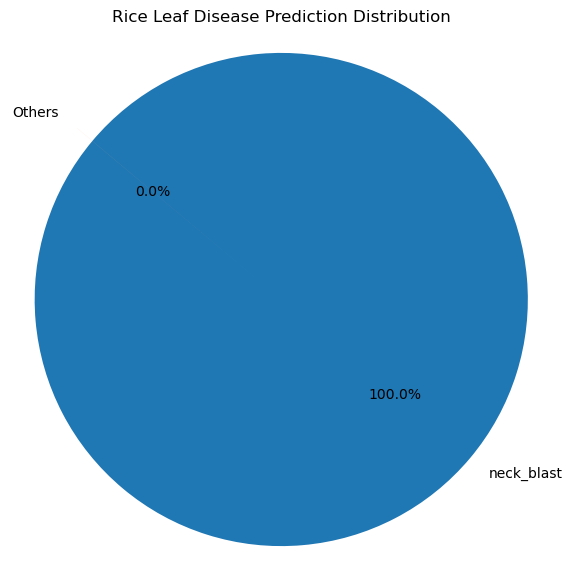

In [41]:
import numpy as np
import matplotlib.pyplot as plt

probs = rslt[0]
labels = class_labels

sorted_idx = np.argsort(probs)[::-1]
sorted_probs = probs[sorted_idx]
sorted_labels = np.array(labels)[sorted_idx]

threshold = 0.02  

main_probs = []
main_labels = []
others_prob = 0

for p, l in zip(sorted_probs, sorted_labels):
    if p >= threshold:
        main_probs.append(p)
        main_labels.append(l)
    else:
        others_prob += p

if others_prob > 0:
    main_probs.append(others_prob)
    main_labels.append("Others")

plt.figure(figsize=(7,7))
plt.pie(
    main_probs,
    labels=main_labels,
    autopct='%1.1f%%',
    startangle=140,
    explode=[0.08] + [0]*(len(main_probs)-1)
)
plt.title("Rice Leaf Disease Prediction Distribution")
plt.axis('equal')
plt.show()

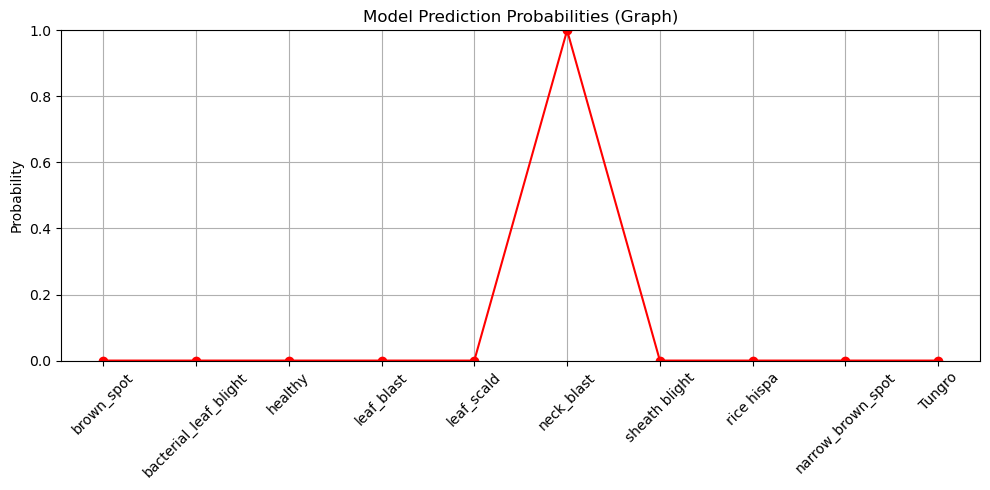

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(CATAGORIES, rslt[0], marker='o', linestyle='-', color='r') 
plt.xticks(rotation=45)
plt.ylabel("Probability")
plt.ylim(0,1)  
plt.title("Model Prediction Probabilities (Graph)")
plt.grid(True)
plt.tight_layout()
plt.show()


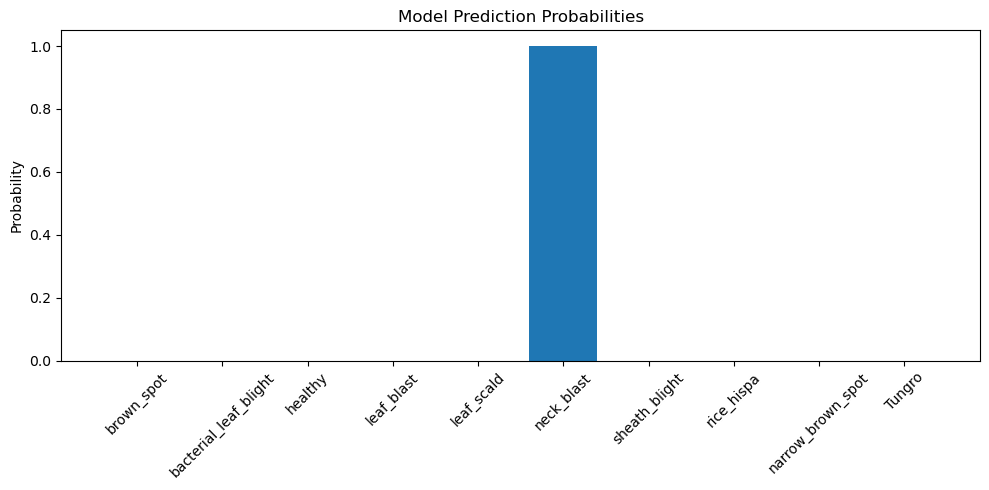

In [43]:
plt.figure(figsize=(10,5))
plt.bar(class_labels, rslt[0])
plt.xticks(rotation=45)
plt.ylabel("Probability")
plt.title("Model Prediction Probabilities")
plt.tight_layout()
plt.show()

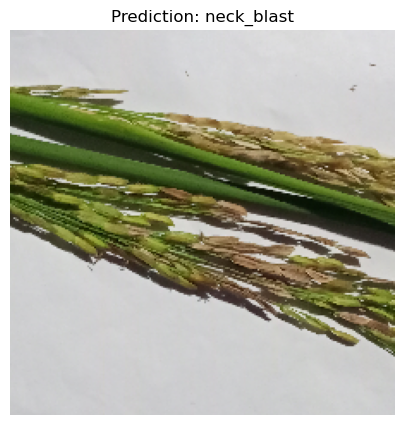

Model Accuracy: 82.03 %


In [44]:
import matplotlib.pyplot as plt
import numpy as np

display_img = (img_pred[0] * 255).astype(np.uint8)

plt.figure(figsize=(5,5))
plt.imshow(display_img)
plt.axis("off")
plt.title(f"Prediction: {prediction}")
plt.show()
print("Model Accuracy:", round(accuracy*100, 2), "%")